# CLIPS Constructs

* Install **clipspy 1.0.5 version, updated on 17 March 2025** for integrating with **CLIPS**
* This integration is able to create interactive solution.
* References: https://clipspy.readthedocs.io/en/latest/

In [ ]:
pip install clipspy

## Section A: Basic CLIPS Working Environment

* Example below shows how to **setup working environment** in **clipspy**

1. **Basic environment**

In [ ]:
import clips 
import logging

# Setup working environment
logging.basicConfig(level=logging.INFO,format='%(message)s')
    
env = clips.Environment()
router = clips.LoggingRouter()
env.add_router(router)

# Reset the environment:
# Method 1: Call the reset function.
#env.reset()

# Method 2: Same command in CLIPS
env.eval("(reset)")

# Inference:
# Method 1: Call the run function.
#env.run()

# Method 2: Same command in CLIPS
env.eval("(run)")


2. **Saving** to the extension of clp file

In [ ]:
import clips 
import logging

# Setup working environment
logging.basicConfig(level=logging.INFO,format='%(message)s')
    
env = clips.Environment()
router = clips.LoggingRouter()
env.add_router(router)

# Define a rule
env.build("""(defrule my-rule
              =>
             (printout t "Hello, World!" crlf))""")

# Save the current environment to a file
env.save("p-clip.clp")


3. **Loading** from the extension of clp file

In [ ]:
import clips 
import logging

# Setup working environment
logging.basicConfig(level=logging.INFO,format='%(message)s')
    
env = clips.Environment()
router = clips.LoggingRouter()
env.add_router(router)

# Load CLIPS file
env.load('p-clip.clp')

# Reset the environment
env.reset()

# Inference
env.run()


## Section B: Manipulate Fact(s)

* **Define Ordered Fact(s)**

1. Add **initial fact(s)** to **working memory** and **display fact(s)**.<br> 
   Initial fact(s) are added when **(reset)** is called.<br> 
   Can be used for define **more than one fact**.

In [ ]:
import clips 
import logging

# Setup working environment
logging.basicConfig(level=15,format='%(message)s')

env = clips.Environment()
router = clips.LoggingRouter()
env.add_router(router)

# Add intitial fact(s) to working memory
env.build('(deffacts initial-state (system-status ready))')

# Reset the environment
env.reset()

# Inference
env.run()

# Display facts:
# Method 1: Cycle through the facts()
# for fact in env.facts():
#     print(fact)

# Method 2: Same command in CLIPS
env.eval("(facts)")

2. Add a **fact** to working memory at **runtime**

In [ ]:
# Add a fact to working memory
env.assert_string("(I fall in love expert system!)")

# Inference
env.run()

# Display facts
for fact in env.facts():
    print(fact)

3. Remove/**retract fact(s)** in **runtime**

In [ ]:
import clips 
import logging

# Setup working environment
logging.basicConfig(level=15,format='%(message)s')
    
env = clips.Environment()
router = clips.LoggingRouter()
env.add_router(router)

# Reset the environment
env.reset()

# Modify a fact to working memory
env.assert_string("(I fall in love!)")
env.assert_string("(He fall in love either!)")

# Inference
env.run()

# Remove/retract the 2nd fact
# Method 1: Cycle through the facts()
# for index,fact in enumerate(env.facts(),start=0):
#     if index == 1:
#         fact.retract()    
        
# Method 2: Same command in CLIPS
env.eval("(retract 2)")
        
# Inference
env.run()

# Check again the facts
for fact in env.facts():
    print(fact)

* **Unordered Fact(s)**
  * A **deftemplate** is used to describe groups of facts sharing the same relation name and contain common information.
  * **Unordered fact** is the actual data entries that adhere to defined template.
  * **deftemplate** is stored in **knowledge base** and **unordered fact** is stored in **working memory**.

1. Define a template (**deftemplate**)

In [ ]:
import clips 
import logging

# Setup working environment
logging.basicConfig(level=15,format='%(message)s')
    
env = clips.Environment()
router = clips.LoggingRouter()
env.add_router(router)

# Define template in knowledge base
env.build("""(deftemplate student
                (slot name)
                (slot age)
                (slot major))""")

# Add facts to working memory

env.assert_string("""(student (name "Jolin Tsai")
                              (age 40)
                              (major "Music Education"))""")

# Method 1: assert_string function 
# env.assert_string("""(student (name "Ooi Ci Jie")
#                               (age 18)
#                               (major "Information Technology"))""")

# Method 2: Same command in CLIPS 
env.eval("""(assert (student (name "Ooi Ci Jie")
                              (age 18)
                              (major "Information Technology")))""")

# Inference
env.run()

# Display facts (template)
for fact in env.facts():
    if fact.template.name == 'student':
        print('Name:' + fact['name'])
        print('Age:' + str(fact['age']))
        print('Major:' + str(fact['major']))
        print(' ')

2. Modify **slots**

In [ ]:
# Modify slots:
# Method 1: Modify through the facts()
# for index, fact in enumerate(env.facts(), start=0):
#     if index == 0:
#         fact.modify_slots(name='James')
#     if fact.template.name == 'student':
#         print('Name:' + fact['name'])
#         print('Age:' + str(fact['age']))
#         print('Major:' + str(fact['major']))
#         print(' ')

# Method 2: Same command in CLIPS 
env.eval("(modify 1 (name 'James'))")

## Section C: Define Rule(s) using defrule

* **Define Rule(s)**

1. Define a **rule** in **knowledge base**

In [ ]:
import clips 
import logging

# Setup working environment
logging.basicConfig(level=15,format='%(message)s')
    
env = clips.Environment()
router = clips.LoggingRouter()
env.add_router(router)

# Define a rule in knowledge base
env.build('(defrule my-rule => (printout t "My Rule fired!" crlf))')

# Reset
env.reset()

# Add a fact to working memory
# Method 1: assert_string function 
#env.assert_string("(my-fact)")

# Method 2: Same command in CLIPS 
env.eval("(assert (my-fact))")

# Inference
env.run()


2. Define **rules** to representing **recipe knowledge base**

In [ ]:
import clips 
import logging

# Setup working environment
logging.basicConfig(level=15,format='%(message)s')
    
env = clips.Environment()
router = clips.LoggingRouter()
env.add_router(router)

# Define rules in knowledge base
env.build("""(defrule omelette
                (eggs)
             =>
             (printout t "You can make an Omelette!" crlf))""")

env.build("""(defrule egg-sandwich
                (eggs)
                (bread)
             =>
             (printout t "You can make Egg sandwich!" crlf))""")

env.build("""(defrule pancakes
                (eggs)
                (milk)
                (flour)
                (margarine)
              =>
            (printout t "You can make Pancakes!" crlf))""")


# Reset
env.reset()

# Add facts to working memory
# Remove the comment and see the effect 1. Explain why?
#env.assert_string('(eggs)(bread)')

# Remove the comment and see the effect 2
#env.eval('(assert (eggs)(bread))')

# Remove the comment and see the effect 3
#env.assert_string('(eggs)')
#env.assert_string('(bread)')

# Inference
env.run()


3. Example from notes of lecture 1

In [ ]:
import clips 
import logging

# Setup working environment
logging.basicConfig(level=15,format='%(message)s')
    
env = clips.Environment()
router = clips.LoggingRouter()
env.add_router(router)

# Define a template
env.build("""(deftemplate mood
               (slot condition))""")

# Define rules
env.build("""(defrule R1
               (mood (condition bad))
             =>
             (printout t "keep quiet!" crlf))""")

env.build("""(defrule R2
               (mood (condition bad))
             =>
             (printout t "buy her lunch..!" crlf))""")

env.build("""(defrule R3
               (mood (condition happy))
             =>
             (printout t "cinema with her!" crlf))""")

# Reset
env.reset()

# Assert a fact to working memory
env.assert_string("(mood (condition bad))")

# Inference
env.run()


3. Define **rules** in **logical AND**

In [ ]:
import clips 
import logging

# Setup working environment
logging.basicConfig(level=15,format='%(message)s')
    
env = clips.Environment()
router = clips.LoggingRouter()
env.add_router(router)

# Implicitly define the rule to print "AND Logic ABC" if facts A, B, and C are present
env.build("""(defrule ABC
               (A)
               (B)
               (C)
              =>
             (printout t "AND Logic - ABC" crlf))
         """)

# Reset the environment
env.reset()

# Assert facts A, B, and C
env.assert_string("(A)")
env.assert_string("(B)")
env.assert_string("(C)")

# Inference
env.run()


In [ ]:
import clips 
import logging

# Setup working environment
logging.basicConfig(level=15,format='%(message)s')
    
env = clips.Environment()
router = clips.LoggingRouter()
env.add_router(router)

# Explitcitly define the rule to print "AND Logic ABC" if facts A, B, and C are present
env.build("""(defrule ABC
               (and (A)
                    (B)
                    (C))
              =>
             (printout t "AND Logic - ABC" crlf))
         """)

# Reset the environment
env.reset()

# Assert facts A, B, and C
env.assert_string("(A)")
env.assert_string("(B)")
env.assert_string("(C)")

# Inference
env.run()

4 Define **rules** in **logical OR**

In [ ]:
import clips 
import logging

# Setup working environment
logging.basicConfig(level=15,format='%(message)s')
    
env = clips.Environment()
router = clips.LoggingRouter()
env.add_router(router)

# Implicitly define the rule to print "A" if facts A is present
env.build("""(defrule A
               (A)
              =>
             (printout t "A" crlf))""")

env.build("""(defrule B
               (B)
             =>
             (printout t "B" crlf))""")

env.build("""(defrule C
               (C)
             =>
             (printout t "C" crlf))""")

# Reset the environment
env.reset()

# Assert facts A, B, and C
env.assert_string("(C)")
env.assert_string("(B)")
env.assert_string("(A)")

# Inference
env.run()

In [ ]:
import clips 
import logging

# Setup working environment
logging.basicConfig(level=15,format='%(message)s')
    
env = clips.Environment()
router = clips.LoggingRouter()
env.add_router(router)

# Explicitly define the rule to print "AND Logic ABC" if facts A, B, and C are present
env.build("""(defrule ABC
               (or (A)
                   (B)
                   (C))
              =>
             (printout t "OR Logic - ABC" crlf))
         """)

# Reset the environment
env.reset()

# Assert facts A, B, and C
env.assert_string("(A)")
env.assert_string("(B)")
env.assert_string("(C)")

# Inference
env.run()

* **Type of Variables**

1. Define **single-field variables**

In [ ]:
import clips 
import logging

# Setup working environment
logging.basicConfig(level=15,format='%(message)s')
    
env = clips.Environment()
router = clips.LoggingRouter()
env.add_router(router)

# Define rules in knowledge base
env.build("""(defrule omelette (egg ?type) 
                  => (printout t "You can make an " ?type crlf))""")

# Add facts to working memory
env.assert_string('(egg scrambled)')

# Inference
env.run()

2. Define **multi-variables**

In [ ]:
import clips 
import logging

# Setup working environment
logging.basicConfig(level=15,format='%(message)s')
    
env = clips.Environment()
router = clips.LoggingRouter()
env.add_router(router)

#Multi-variables
env.build("""(defrule person (name ?first ?last)
             => (printout t ?last " has children " ?first crlf))""")

# Reset the environment
env.reset()

env.assert_string('(name Jack Fun)')

# Inference
env.run()

3. Define **multislot** in **deftemplate**. **Method 1**: Display template based on facts.

In [ ]:
import clips 
import logging

# Setup working environment
logging.basicConfig(level=15,format='%(message)s')
    
env = clips.Environment()
router = clips.LoggingRouter()
env.add_router(router)

# Define template with multislot
env.build("""(deftemplate person
                 (multislot name))""")

# Reset the environment
env.reset()

env.assert_string("(person (name 'Jack' 'Fun'))")
env.assert_string("(person (name 'Jocker' 'Funny'))")

# Inference
env.run()

# Display multislot values
for fact in env.facts():
    if fact.template.name == 'person':
        val = list(fact['name'])
        print('Last Name:'+val[0])
        print('First Name:'+val[1])
        print(' ')

4. Define **multifields** in **deftemplate**. **Method 2**: Display template based on rules.

In [ ]:
import clips 
import logging

# Setup working environment
logging.basicConfig(level=15,format='%(message)s')
    
env = clips.Environment()
router = clips.LoggingRouter()
env.add_router(router)


env.build("""(deftemplate person
               (multislot name)
               (multislot children))""")

env.build("""(deffacts some-people
               (person (name John Q. Public)
                   (children Jane Paul Mary))
               (person (name Jack R. Public)
                   (children Risk)))""")

env.build("""(defrule print-children
               (person (name $?name) ;; notice the $?
                   (children $?children))
             =>(printout t $?name " has children " $?children crlf))""")

env.reset()

env.run()

# Section D: Simple Expert System 

Install easygui for simple GUI

In [ ]:
#pip install easygui

In [ ]:
import clips
import easygui

env = clips.Environment()

# input
name = easygui.enterbox("Enter a name:")

# knowledge base
env.build('(deftemplate result (slot name))')
# add facts to working memory
env.assert_string(f'(result (name "{name}"))')
# inference
env.run()

# output
results = []
for fact in env.facts():
    if fact.template.name == 'result':
        results.append(fact['name']) #Why assert the fact? 
        
easygui.msgbox(results[0],"Output")
 

### Exercises:
Create CLIPS constructs according to the knowledge representation (decision tree) below. 
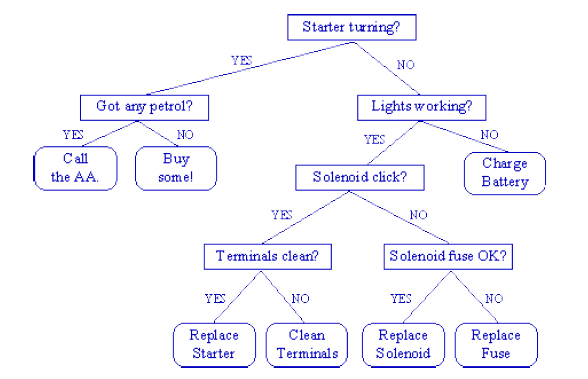